In [356]:
import matplotlib
%matplotlib inline

import pandas as pd

In [357]:
df_prix = pd.read_csv('datas/Prix_Petrole_Brut.csv')
df_production = pd.read_csv('datas/Production_Petrole_Brut.csv')
df_approvisionnement = pd.read_csv('datas/Approvisionnement_Energie_Primaire.csv')

df = pd.DataFrame()

In [358]:
df = df_approvisionnement.join(df_production,lsuffix='_approvisionnement', rsuffix='_production')

In [359]:
df.head()

,LOCATION_approvisionnement,INDICATOR_approvisionnement,SUBJECT_approvisionnement,MEASURE_approvisionnement,FREQUENCY_approvisionnement,TIME_approvisionnement,Value_approvisionnement,Flag Codes_approvisionnement,LOCATION_production,INDICATOR_production,SUBJECT_production,MEASURE_production,FREQUENCY_production,TIME_production,Value_production,Flag Codes_production
0,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,A,1980,0.191,NaN,AUS,OILPROD,TOT,KTOE,A,1980,19471.877,NaN
1,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,A,1981,0.186,NaN,AUS,OILPROD,TOT,KTOE,A,1981,19007.475,NaN
2,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,A,1982,0.198,NaN,AUS,OILPROD,TOT,KTOE,A,1982,18706.129,NaN
3,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,A,1983,0.182,NaN,AUS,OILPROD,TOT,KTOE,A,1983,18220.054,NaN
4,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,A,1984,0.178,NaN,AUS,OILPROD,TOT,KTOE,A,1984,22148.899,NaN


In [360]:
df = df.rename(index=str,columns={"TIME_approvisionnement" : "TIME"})
df.head()

,LOCATION_approvisionnement,INDICATOR_approvisionnement,SUBJECT_approvisionnement,MEASURE_approvisionnement,FREQUENCY_approvisionnement,TIME,Value_approvisionnement,Flag Codes_approvisionnement,LOCATION_production,INDICATOR_production,SUBJECT_production,MEASURE_production,FREQUENCY_production,TIME_production,Value_production,Flag Codes_production
0,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,A,1980,0.191,NaN,AUS,OILPROD,TOT,KTOE,A,1980,19471.877,NaN
1,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,A,1981,0.186,NaN,AUS,OILPROD,TOT,KTOE,A,1981,19007.475,NaN
2,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,A,1982,0.198,NaN,AUS,OILPROD,TOT,KTOE,A,1982,18706.129,NaN
3,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,A,1983,0.182,NaN,AUS,OILPROD,TOT,KTOE,A,1983,18220.054,NaN
4,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,A,1984,0.178,NaN,AUS,OILPROD,TOT,KTOE,A,1984,22148.899,NaN


In [361]:
del df['TIME_production']

In [362]:
df.head()

,LOCATION_approvisionnement,INDICATOR_approvisionnement,SUBJECT_approvisionnement,MEASURE_approvisionnement,FREQUENCY_approvisionnement,TIME,Value_approvisionnement,Flag Codes_approvisionnement,LOCATION_production,INDICATOR_production,SUBJECT_production,MEASURE_production,FREQUENCY_production,Value_production,Flag Codes_production
0,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,A,1980,0.191,NaN,AUS,OILPROD,TOT,KTOE,A,19471.877,NaN
1,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,A,1981,0.186,NaN,AUS,OILPROD,TOT,KTOE,A,19007.475,NaN
2,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,A,1982,0.198,NaN,AUS,OILPROD,TOT,KTOE,A,18706.129,NaN
3,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,A,1983,0.182,NaN,AUS,OILPROD,TOT,KTOE,A,18220.054,NaN
4,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,A,1984,0.178,NaN,AUS,OILPROD,TOT,KTOE,A,22148.899,NaN


In [363]:
df = df.rename(columns={"LOCATION_approvisionnement":"LOCATION"})
df = df.rename(columns={"FREQUENCY_production":"FREQUENCY"})

In [364]:
del df['LOCATION_production']
del df['FREQUENCY_approvisionnement']

In [365]:
df.tail()

,LOCATION,INDICATOR_approvisionnement,SUBJECT_approvisionnement,MEASURE_approvisionnement,TIME,Value_approvisionnement,Flag Codes_approvisionnement,INDICATOR_production,SUBJECT_production,MEASURE_production,FREQUENCY,Value_production,Flag Codes_production
5391,ZWE,PRYENRGSUPPLY,TOT,TOE_1000USD,2013,0.382,NaN,OILPROD,TOT,KTOE,A,0.0,NaN
5392,ZWE,PRYENRGSUPPLY,TOT,TOE_1000USD,2014,0.381,NaN,OILPROD,TOT,KTOE,A,0.0,NaN
5393,ZWE,PRYENRGSUPPLY,TOT,TOE_1000USD,2015,0.382,NaN,OILPROD,TOT,KTOE,A,0.0,NaN
5394,ZWE,PRYENRGSUPPLY,TOT,TOE_1000USD,2016,0.374,NaN,OILPROD,TOT,KTOE,A,0.0,NaN
5395,ZWE,PRYENRGSUPPLY,TOT,TOE_1000USD,2017,NaN,L,OILPROD,TOT,KTOE,A,0.0,NaN


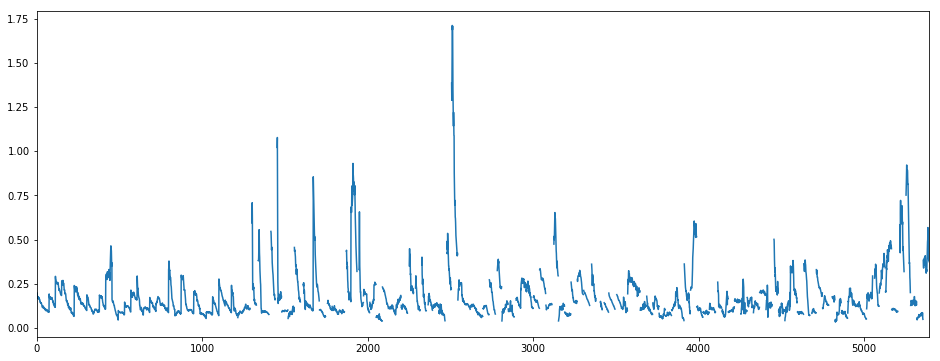

In [378]:
df['Value_approvisionnement'].plot(figsize=(16,6))

In [367]:
df.head()

,LOCATION,INDICATOR_approvisionnement,SUBJECT_approvisionnement,MEASURE_approvisionnement,TIME,Value_approvisionnement,Flag Codes_approvisionnement,INDICATOR_production,SUBJECT_production,MEASURE_production,FREQUENCY,Value_production,Flag Codes_production
0,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,1980,0.191,NaN,OILPROD,TOT,KTOE,A,19471.877,NaN
1,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,1981,0.186,NaN,OILPROD,TOT,KTOE,A,19007.475,NaN
2,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,1982,0.198,NaN,OILPROD,TOT,KTOE,A,18706.129,NaN
3,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,1983,0.182,NaN,OILPROD,TOT,KTOE,A,18220.054,NaN
4,AUS,PRYENRGSUPPLY,TOT,TOE_1000USD,1984,0.178,NaN,OILPROD,TOT,KTOE,A,22148.899,NaN


In [368]:
df_prix.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,OILIMPPRICE,TOT,USD_BAR,A,1980,31.81,NaN
1,AUS,OILIMPPRICE,TOT,USD_BAR,A,1981,35.88,NaN
2,AUS,OILIMPPRICE,TOT,USD_BAR,A,1982,35.42,NaN
3,AUS,OILIMPPRICE,TOT,USD_BAR,A,1983,30.88,NaN
4,AUS,OILIMPPRICE,TOT,USD_BAR,A,1984,29.19,NaN


In [387]:
df = pd.merge(df, df_prix[['LOCATION', 'Value','TIME']], on=['LOCATION','TIME'],how='left')

In [388]:
df = df.rename(columns={"Value":"Value_prix"})

In [396]:
df.to_csv('datas/df_final.csv')

In [390]:
df_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5396 entries, 0 to 5395
Data columns (total 8 columns):
LOCATION      5396 non-null object
INDICATOR     5396 non-null object
SUBJECT       5396 non-null object
MEASURE       5396 non-null object
FREQUENCY     5396 non-null object
TIME          5396 non-null int64
Value         5087 non-null float64
Flag Codes    309 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 337.3+ KB


In [391]:
df_prix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 8 columns):
LOCATION      1064 non-null object
INDICATOR     1064 non-null object
SUBJECT       1064 non-null object
MEASURE       1064 non-null object
FREQUENCY     1064 non-null object
TIME          1064 non-null int64
Value         875 non-null float64
Flag Codes    189 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 66.6+ KB
